In [1]:
# dependancies and setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import Full Datetime
import calendar

---
# Breach Data
---

### Pull and format data for analysis

In [2]:
# import csv
cyber_data = pd.read_csv('source_data/cyber_data_clean.csv')
cyber_data.head()

,Unnamed: 0,Breach ID,State,Year,Full Date
0,1054,725,TX,2012,2012-12-27
1,1053,438,CA,2011,2011-12-22
2,1052,818,MO,2009,2009-12-21
3,1050,676,MA,2012,2012-12-15
4,1049,638,CA,2012,2012-12-10


In [3]:
# drop unneeded column
cyber_data = cyber_data.drop(['Unnamed: 0'], axis=1)

# add month column
cyber_data['Month'] = pd.Full DatetimeIndex(cyber_data['Full Full Date']).month
cyber_data['Month'] = cyber_data['Month'].apply(lambda x: calendar.month_abbr[x])
cyber_data.head()

,Breach ID,State,Year,Full Date,Month
0,725,TX,2012,2012-12-27,Dec
1,438,CA,2011,2011-12-22,Dec
2,818,MO,2009,2009-12-21,Dec
3,676,MA,2012,2012-12-15,Dec
4,638,CA,2012,2012-12-10,Dec


---
### Get a sense of the data by running inital analysis

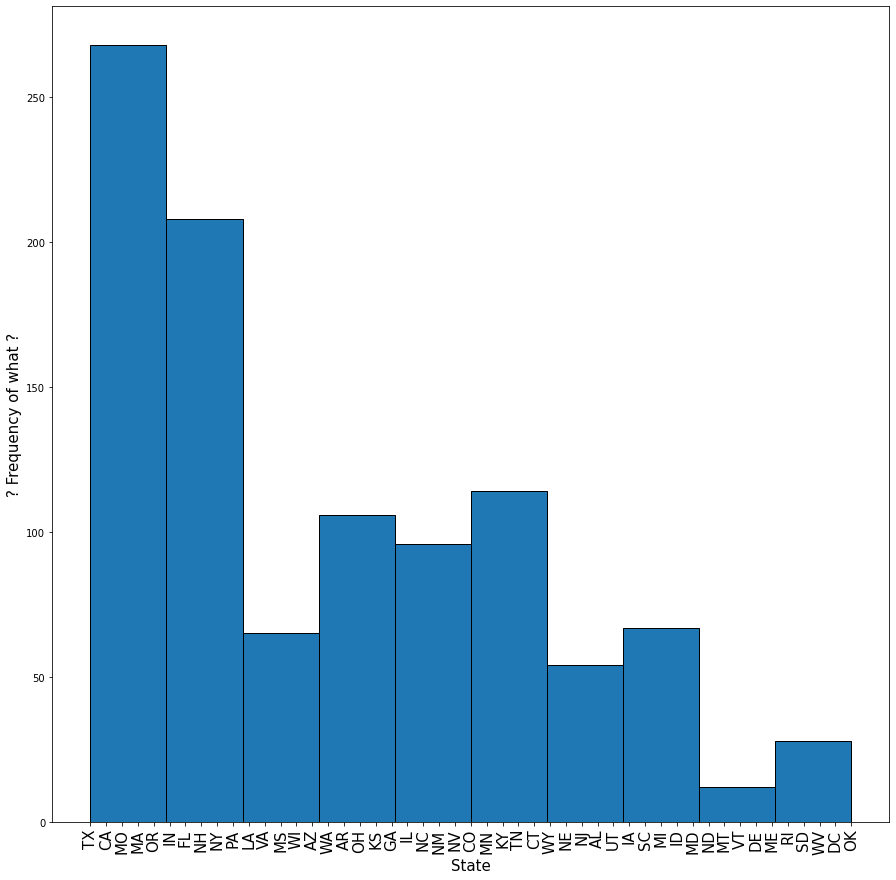

In [4]:
# look at overall data distribution
len_brch = len(cyber_data['State'])
plt.figure(figsize=(15,15))
plt.hist(cyber_data['State'], bins=10, edgecolor='black')
plt.xticks(rotation=90, size=15)
plt.xlabel('State', size=15)
plt.ylabel('? Frequency of what ?', size=15)
plt.show()
# looks very abnormal

In [5]:
cyber_data.describe()

,Breach ID,Year
count,1018.000000,1018.000000
mean,527.172888,2011.454813
std,303.984328,1.587321
min,0.000000,1997.000000
25%,263.250000,2010.000000
50%,532.500000,2012.000000
75%,787.750000,2013.000000
max,1054.000000,2014.000000


### Find the States with the most and least data breaches

In [6]:
# group data and count breach occurances
# sort values so that the max is at the top and min is last
top_breach_States = pd.DataFrame(cyber_data.groupby(['State'])['Breach ID'].count().sort_values(ascending=False))

# use describe to identify min/max values for boolean then convert to int
st_breach_max = int(top_breach_States.describe().max()) 
st_breach_min = int(top_breach_States.describe().min())

#isolate the min State
top_breach_States[top_breach_States['Breach ID']==st_breach_min]
# isolate the max State
top_breach_States[top_breach_States['Breach ID']==st_breach_max]

,Breach ID
State,
CA,113


## BARCHART OF StateS & BRAECH COUNT

### Look for trends over the Years

In [7]:
# DF of breach counts by YR 
# remove Years with very little data
cyber_data = cyber_data[cyber_data['Year']>2007]
yr_breach_count = pd.DataFrame(cyber_data.groupby(['Year'])['Breach ID'].count())                              
yr_breach_count = yr_breach_count.rename(columns={'Breach ID': 'Breach Count'}) 
yr_breach_count.reset_index().sort_values('Breach Count',ascending=True).head()
yr_breach_count

,Breach Count
Year,
2008,11
2009,55
2010,203
2011,221
2012,219
2013,244
2014,56


# BARCHART CHART HERE Year AND BREACH COUNT

---

## Isolate data to most occurances of data breaches

In [8]:
# pull only the data points that are in tX & CA
tx_breaches = cyber_data.loc[(cyber_data['State']=='TX')]
ca_breaches = cyber_data.loc[(cyber_data['State']=='CA')]

## Look at all breaches for all Years over the dataset 

----
# **Fire Data** 

---
### Pull and format data for analysis

In [37]:
# pull in fire data from API results
firedf = pd.read_csv('source_data/disaster_data.csv')
firedf.head()

,Unnamed: 0,dis_id,date,state,type
0,1743,5f7b2c0831a8c6681cfd7421,2008-02-08,TX,Fire
1,1744,5f7b2c0831a8c6681cfd7423,2008-02-13,TX,Fire
2,1745,5f7b2c0831a8c6681cfd7426,2008-02-23,TX,Fire
3,1746,5f7b2c0831a8c6681cfd742a,2008-02-25,TX,Fire
4,1747,5f7b2c0831a8c6681cfd742e,2008-02-25,OK,Fire


In [38]:
# add month and yr columns
firedf['Month'] = pd.DatetimeIndex(firedf['date']).month
firedf['Year'] = pd.DatetimeIndex(firedf['date']).year
# change month # to month name
firedf['Month'] = firedf['Month'].apply(lambda x: calendar.month_abbr[x])
# drop unnamed column
del firedf['Unnamed: 0']

In [39]:
# Change all column names to match data_df headers
firedf = firedf.rename(columns={'dis_id':'Fire ID', 'date':'Full Date', 'state':'State', 'type':'Type'})
firedf

,Fire ID,Full Date,State,Type,Month,Year
0,5f7b2c0831a8c6681cfd7421,2008-02-08,TX,Fire,Feb,2008
1,5f7b2c0831a8c6681cfd7423,2008-02-13,TX,Fire,Feb,2008
2,5f7b2c0831a8c6681cfd7426,2008-02-23,TX,Fire,Feb,2008
3,5f7b2c0831a8c6681cfd742a,2008-02-25,TX,Fire,Feb,2008
4,5f7b2c0831a8c6681cfd742e,2008-02-25,OK,Fire,Feb,2008
...,...,...,...,...,...,...
861,5f7b2c3231a8c6681cfffc55,2014-09-13,CA,Fire,Sep,2014
862,5f7b2c3231a8c6681cfffc49,2014-09-14,CA,Fire,Sep,2014
863,5f7b2c3231a8c6681cfffc4b,2014-09-15,CA,Fire,Sep,2014
864,5f7b2c3231a8c6681cfffc4e,2014-09-15,OR,Fire,Sep,2014


---
### Get a sense of the data by running inital analysis

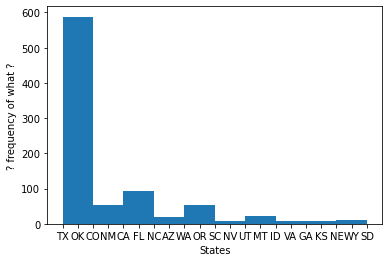

In [40]:
# look at overall data distribution
len_brch = len(firedf['State'])
plt.hist(firedf['State'], bins=10)
plt.xlabel('States')
plt.ylabel('? frequency of what ?')
plt.show()
# looks very abnormal

In [41]:
firedf.describe()

,Year
count,866.000000
mean,2010.090069
std,1.833211
min,2008.000000
25%,2008.000000
50%,2011.000000
75%,2011.000000
max,2014.000000


In [42]:
# DF of breach counts by YR
firedf['Year'].sort_values(ascending=False)
yr_fire_count = pd.DataFrame(firedf.groupby(['Year'])['Fire ID'].count())                              
yr_fire_count = yr_fire_count.rename(columns={'Fire ID': 'Fire Count'}) 
yr_fire_count.reset_index().sort_values('Fire Count',ascending=False).head()

,Year,Fire Count
3,2011,333
0,2008,308
4,2012,69
1,2009,59
6,2014,42


### Find the State with the most & least wildfires

In [43]:
# group data and count wildfire occurances
# sort values so that the max is at the top and min is last
st_fire_count = pd.DataFrame(firedf.groupby(['State'])['Fire ID'].count().sort_values(ascending=False))
# use describe to identify min/max values for boolean then convert to int
st_fire_max = int(st_fire_count.describe().max()) 
st_fire_min = int(st_fire_count.describe().min())
st_fire_count.describe()

#isolate the min State
st_fire_count[st_fire_count['Fire ID']==st_fire_min]
# isolate the max State
st_fire_count[st_fire_count['Fire ID']==st_fire_max]

,Fire ID
State,
TX,533


## BARCHART OF StateS & BRAECH COUNT

### Look for trends over the years

In [44]:
# DF of breach counts by YR
firedf['Year'].sort_values(ascending=False)
yr_fire_count = pd.DataFrame(firedf.groupby(['Year'])['Fire ID'].count())                              
yr_fire_count = yr_fire_count.rename(columns={'Fire ID': 'Fire Count'}) 
yr_fire_count.reset_index().sort_values('Fire Count',ascending=False).head()

,Year,Fire Count
3,2011,333
0,2008,308
4,2012,69
1,2009,59
6,2014,42


# BARCHART CHART HERE Year AND BREACH COUNT

----
## Isolate data to most occurances of data breaches

In [45]:
# pull only the data points that are in tX & CA
tx_fires = firedf.loc[(firedf['State']=='TX')]
ca_fires = firedf.loc[(firedf['State']=='CA')]

# BOX PLOT HERE All States over all Years

----
# COMBINED ANALYSIS
----

## State fires each Year v State breaches each Year

In [68]:
# define the x & y labels
xax_label = list(cyber_data['State'])
yax_label = list(np.arange(2008,2015,1))

# inner merge for common data point in both data sets
common_data = cyber_data.merge(firedf, on=['Full Date','State','Month', 'Year'])
common_data.head(3)

,Breach ID,State,Year,Full Date,Month,Fire ID,Type
0,829,CA,2013,2013-09-09,Sep,5f7b2c3131a8c6681cfffbbd,Fire
1,785,CO,2013,2013-06-11,Jun,5f7b2c3131a8c6681cfffb56,Fire
2,785,CO,2013,2013-06-11,Jun,5f7b2c2531a8c6681cff40b0,Fire


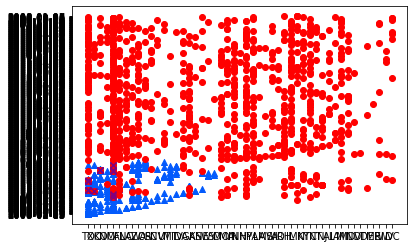

In [69]:

#plt.scatter([firedf['State'],cyber_data['State']], [firedf['Full Date'],cyber_data['Full Full Date']],color='#46bdc6',marker='^')
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(firedf['State'], firedf['Full Date'],color='#035afc',marker='^')
ax1.scatter(cyber_data['State'], cyber_data['Full Date'],color='red',marker='o')
ax1.scatter(common_data['State'],common_data['Full Date'], color='purple',marker='x')

## TX Fires v. TX Breaches
* Scatter Plot

In [72]:
#isolate common TX data between breaches and fires
tx_common_data = common_data[common_data['State']=='TX']
#gather texas data for easy plotting
tx_fire_xax = tx_fires['Year']
tx_fire_yax = tx_fires['Month']
tx_breach_xax = tx_breaches['Year']
tx_breach_yax = tx_breaches['Month']
tx_common_xax = tx_common_data['Year']
tx_common_yax = tx_common_data['Month']

## CA Fires v. CA Breaches
* Scatter Plot

In [73]:
#isolate common CA data between breaches and fires
ca_common_data = common_data[common_data['State']=='CA']
#gather califonia data for easy plotting
ca_fire_xax = ca_fires['Year']
ca_fire_yax = ca_fires['Month']
ca_breach_xax = ca_breaches['Year']
ca_breach_yax = ca_breaches['Month']
ca_common_xax = ca_common_data['Year']
ca_common_yax = ca_common_data['Month']

## YR Fires v. YR Breaches
* Line chart w/ both data sets

In [50]:
yr_breach_count
yr_fire_count

,Fire Count
Year,
2008,308
2009,59
2010,17
2011,333
2012,69
2013,38
2014,42
